# Randomizing and reducing the data from 27563 photos to 1000 photos for the uninfected (from malaria) photos and parasitized photos. Each factor should have 500 photos.

### Uninfected with Malaria photos - Randomize

In [3]:
import os
import shutil
import random

# Input folder with all images
input_folder = "Dataset\\cell_images\\Uninfected"

# Output folder to store the randomly selected images
output_folder = "Dataset\clean\output_uninfected"  

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List all files in the input folder
files = os.listdir(input_folder)

# Shuffle the list of files randomly
random.shuffle(files)

# Number of images to select (500 in this case)
num_images_to_select = 500

# Loop through the first 500 files (randomly shuffled)
for i in range(min(num_images_to_select, len(files))):
    # Get the file path of the current image
    image_path = os.path.join(input_folder, files[i])

    # Move the image to the output folder
    shutil.move(image_path, os.path.join(output_folder, files[i]))

print("Random selection complete.")


Random selection complete.


### Parasitized with Malaria photos - Randomize

In [4]:
# Input folder with all images
input_folder = "Dataset\\cell_images\\Parasitized"

# Output folder to store the randomly selected images
output_folder = "Dataset\clean\output_parasitized"  

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List all files in the input folder
files = os.listdir(input_folder)

# Shuffle the list of files randomly
random.shuffle(files)

# Number of images to select (500 in this case)
num_images_to_select = 500

# Loop through the first 500 files (randomly shuffled)
for i in range(min(num_images_to_select, len(files))):
    # Get the file path of the current image
    image_path = os.path.join(input_folder, files[i])

    # Move the image to the output folder
    shutil.move(image_path, os.path.join(output_folder, files[i]))

print("Random selection complete.")

Random selection complete.


# Reprocessing the images to go from 150x150 to 25x25 and changing them from RGB to Black and White

### Uninfected with Malaria Photos - Processed

In [11]:
from PIL import Image

# Input and output folder paths
input_folder = "Dataset\clean\output_uninfected" 
output_folder = "Dataset\clean\output_uninfected_process"  

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List all files in the input folder
files = os.listdir(input_folder)

# Loop through each file in the input folder
for file in files:
    # Check if the file is an image 
    if file.endswith((".png")):
        # Open the image
        image_path = os.path.join(input_folder, file)
        image = Image.open(image_path)

        # Resize the image to 25x25 pixels
        new_size = (25, 25)
        resized_image = image.resize(new_size)

        # Convert the image to black and white
        # bw_image = resized_image.convert("L")

        # Save the resulting image in the output folder with the same filename
        output_path = os.path.join(output_folder, file)
        # bw_image.save(output_path)
        resized_image.save(output_path)

print("Conversion complete.")


Conversion complete.


### Parasitized with Malaria photos - Processed

In [10]:
# Input and output folder paths
input_folder = "Dataset\clean\output_parasitized" 
output_folder = "Dataset\clean\output_parasitized_process"  

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List all files in the input folder
files = os.listdir(input_folder)

# Loop through each file in the input folder
for file in files:
    # Check if the file is an image 
    if file.endswith((".png")):
        # Open the image
        image_path = os.path.join(input_folder, file)
        image = Image.open(image_path)

        # Resize the image to 25x25 pixels
        new_size = (25, 25)
        resized_image = image.resize(new_size)

        # Convert the image to black and white
        # bw_image = resized_image.convert("L")

        # Save the resulting image in the output folder with the same filename
        output_path = os.path.join(output_folder, file)
        # bw_image.save(output_path)

        resized_image.save(output_path)

print("Conversion complete.")

Conversion complete.


# Process of creating a DataFrame

In [26]:
#Parasitized
import numpy as np
import pandas as pd
import cv2
# Folder containing your images
folder_path = 'Dataset\clean\output_parasitized_process'  
# Initialize an empty list to store the pixel values for each image
image_data = []
# Loop through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # Construct the full path to the image
        image_path = os.path.join(folder_path, filename)
        # Load the image using Pillow
        img = Image.open(image_path)
        # Convert the image to a NumPy array
        img_array = np.array(img)
        # Flatten the NumPy array into a 1D array (1 column per pixel)
        img_array_flattened = img_array.flatten()
        # Append the flattened array to the list
        image_data.append(img_array_flattened)
# Create a DataFrame from the list of flattened image arrays
# parasitized_df = pd.DataFrame(image_data)
# Now, df contains a DataFrame where each column represents a pixel value, and each row represents an image
# parasitized_df

#Save the df into a CSV 
# parasitized_df.to_csv('Dataset\parasitized_df.csv', index=False)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Dataset\\clean\\output_parasitized_process'

In [3]:
import cv2
import matplotlib.pyplot as plt
import os
parasitized_folder_path = os.path.join('Dataset', 'cell_images', 'Parasitized')
uninfected_folder_path = os.path.join('Dataset', 'cell_images', 'Uninfected')

parasitized_avg_colors = []
uninfected_avg_colors = []
i = 0
folder_path = parasitized_folder_path
# Loop through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # Construct the full path to the image
        image_path = os.path.join(folder_path, filename)
        
        # Load image
        img = cv2.imread(image_path)

        parasitized_avg_colors.append(img.mean())
        i += 1
    if i == 100: break

i = 0
folder_path = uninfected_folder_path
# Loop through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # Construct the full path to the image
        image_path = os.path.join(folder_path, filename)
        
        # Load image
        img = cv2.imread(image_path)

        uninfected_avg_colors.append(img.mean())
        i += 1
    if i == 100: break

(array([ 2.,  4.,  5.,  9., 12., 17., 21., 21.,  7.,  2.]),
 array([ 80.22699725,  86.5918584 ,  92.95671956,  99.32158072,
        105.68644188, 112.05130304, 118.4161642 , 124.78102536,
        131.14588652, 137.51074768, 143.87560884]),
 <BarContainer object of 10 artists>)

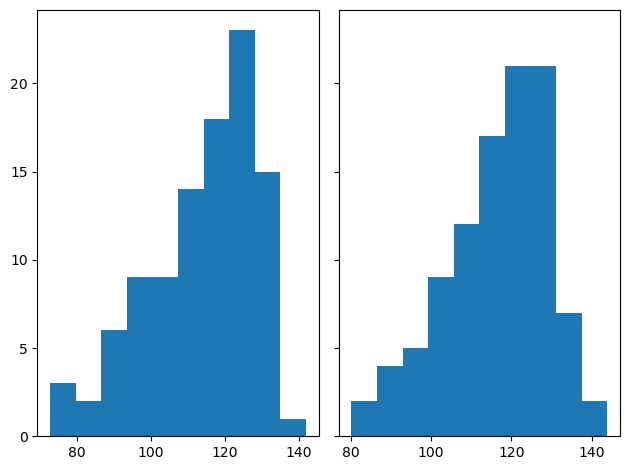

In [4]:
dist1 = parasitized_avg_colors
dist2 = uninfected_avg_colors
n_bins = 10

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
import matplotlib.pyplot as plt
# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)

In [ ]:
img_path = 'Dataset\clean\output_parasitized2\C48P9thinF_IMG_20150721_160406_cell_233.png'
image = cv2.imread(img_path)

#Show the image with matplotlib
plt.imshow(image)
plt.show()

In [40]:
np.mean(image)

98.25352254809208

In [22]:
parasitized_df.head(37)

,0,1,2,3,4,5,6,7,8,9,...,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,121,16,13,12,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
negative_rows = parasitized_df[(parasitized_df < 0).any(axis=1)]

# Display the filtered rows
print(negative_rows)

     0     1     2     3     4     5     6     7     8     9     ...  1865  \
0       0     0     0     0     0     0     0     0     0     0  ...     0   
1       0     0     0     0     0     0     0     0     0     0  ...     0   
2       0     0     0     0     0     0     0     0     0     0  ...     0   
3       0     0     0     0     0     0     0     0     0     0  ...     0   
4       0     0     0     0     0     0     0     0     0     0  ...     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
495     0     0     0     0     0     0     0     0     0     0  ...     0   
496     0     0     0     0     0     0     0     0     0     0  ...     0   
497     0     0     0     0     0     0     0     0     0     0  ...     0   
498     0     0     0     0     0     0     0     0     0     0  ...     0   
499     0     0     0     0     0     0     0     0     0     0  ...     0   

     1866  1867  1868  1869  1870  1871  1872  1873  1874  
0  

In [14]:
#Uninfected 
import numpy as np
import pandas as pd
# Folder containing your images
folder_path = 'Dataset\clean\output_uninfected_process'  
# Initialize an empty list to store the pixel values for each image
image_data = []
# Loop through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Construct the full path to the image
        image_path = os.path.join(folder_path, filename)
        # Load the image using Pillow
        img = Image.open(image_path)
        # Convert the image to a NumPy array
        img_array = np.array(img)
        # Flatten the NumPy array into a 1D array (1 column per pixel)
        img_array_flattened = img_array.flatten()
        # Append the flattened array to the list
        image_data.append(img_array_flattened)
# Create a DataFrame from the list of flattened image arrays
df = pd.DataFrame(image_data)
# Now, df contains a DataFrame where each column represents a pixel value, and each row represents an image
df

,0,1,2,3,4,5,6,7,8,9,...,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,7,5,5,83,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,35,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
filtered_df = parasitized_df[(parasitized_df > 0).any(axis=1)]

# Display the filtered DataFrame
print(filtered_df)

     0     1     2     3     4     5     6     7     8     9     ...  1865  \
0       0     0     0     0     0     0     0     0     0     0  ...     0   
1       0     0     0     0     0     0     0     0     0     0  ...     0   
2       0     0     0     0     0     0     0     0     0     0  ...     0   
3       0     0     0     0     0     0     0     0     0     0  ...     0   
4       0     0     0     0     0     0     0     0     0     0  ...     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
495     0     0     0     0     0     0     0     0     0     0  ...     0   
496     0     0     0     0     0     0     0     0     0     0  ...     0   
497     0     0     0     0     0     0     0     0     0     0  ...     0   
498     0     0     0     0     0     0     0     0     0     0  ...     0   
499     0     0     0     0     0     0     0     0     0     0  ...     0   

     1866  1867  1868  1869  1870  1871  1872  1873  1874  
0  

In [24]:
#Parasitized un processed 
import numpy as np
import pandas as pd
# Folder containing your images
folder_path = 'Dataset\clean\output_parasitized'  
# Initialize an empty list to store the pixel values for each image
image_data = []
# Loop through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Construct the full path to the image
        image_path = os.path.join(folder_path, filename)
        # Load the image using Pillow
        img = Image.open(image_path)
        # Convert the image to a NumPy array
        img_array = np.array(img)
        # Flatten the NumPy array into a 1D array (1 column per pixel)
        img_array_flattened = img_array.flatten()
        # Append the flattened array to the list
        image_data.append(img_array_flattened)
# Create a DataFrame from the list of flattened image arrays
parasitized_df_u = pd.DataFrame(image_data)
# Now, df contains a DataFrame where each column represents a pixel value, and each row represents an image
parasitized_df_u

#Save the df into a CSV 
parasitized_df_u.to_csv('Dataset\parasitized_df2.csv', index=False)

In [25]:
parasitized_df_u.head(37)

,0,1,2,3,4,5,6,7,8,9,...,153308,153309,153310,153311,153312,153313,153314,153315,153316,153317
0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
